In [1]:
import pandas as pd
import plotly.express as px

%matplotlib inline

 # Static visualization of COVID-19 data 
 
 * Data source url = 'https://ourworldindata.org/covid-cases
 * COVID19 infected cases (relative plot - normalised over population) and vaccination cases
 * Static visualization for data until 24.06.2022

## Delivery 1 – Figure1: The relative cases overtime of Covid infectors (absolute Covid cases/population size)

### Data preparation

In [2]:
url = 'https://ourworldindata.org/covid-cases'

In [3]:
#Load the data into a pandas dataframe. 
df=pd.read_csv("../data/external/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# a lot of NaNs that we need to fill with some values
df.isnull().sum()

iso_code                                        0
continent                                   11386
location                                        0
date                                            0
total_cases                                  7902
                                            ...  
human_development_index                     38915
excess_mortality_cumulative_absolute       189601
excess_mortality_cumulative                189601
excess_mortality                           189601
excess_mortality_cumulative_per_million    189601
Length: 67, dtype: int64

In [5]:
#Fill NaNs with 0 and then drop all countries with iso_code = 0. This is key information that we need so dropping unknowns is the best way to handle. 
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [6]:
#Check how many nulls after filling
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196316 entries, 0 to 196315
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    196316 non-null  object 
 1   continent                                   196316 non-null  object 
 2   location                                    196316 non-null  object 
 3   date                                        196316 non-null  object 
 4   total_cases                                 196316 non-null  float64
 5   new_cases                                   196316 non-null  float64
 6   new_cases_smoothed                          196316 non-null  float64
 7   total_deaths                                196316 non-null  float64
 8   new_deaths                                  196316 non-null  float64
 9   new_deaths_smoothed                         196316 non-null  float64
 

In [8]:
#Print column names and drop the ones not using
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
df.drop(['total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],axis=1, inplace=True)

### Data Understanding

Germany as an example

In [10]:
#Save Germany data into a separate dataframe
df_germany = df[df["iso_code"] == 'DEU'].copy()
df_germany

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,population,population_density
66199,DEU,Europe,Germany,2020-01-27,1.0,1.0,0.000,83900471.0,237.016
66200,DEU,Europe,Germany,2020-01-28,4.0,3.0,0.000,83900471.0,237.016
66201,DEU,Europe,Germany,2020-01-29,4.0,0.0,0.000,83900471.0,237.016
66202,DEU,Europe,Germany,2020-01-30,4.0,0.0,0.000,83900471.0,237.016
66203,DEU,Europe,Germany,2020-01-31,5.0,1.0,0.000,83900471.0,237.016
...,...,...,...,...,...,...,...,...,...
67073,DEU,Europe,Germany,2022-06-19,27211896.0,6941.0,57521.571,83900471.0,237.016
67074,DEU,Europe,Germany,2022-06-20,27334993.0,123097.0,59986.857,83900471.0,237.016
67075,DEU,Europe,Germany,2022-06-21,27454225.0,119232.0,63828.000,83900471.0,237.016
67076,DEU,Europe,Germany,2022-06-22,27573585.0,119360.0,68144.857,83900471.0,237.016


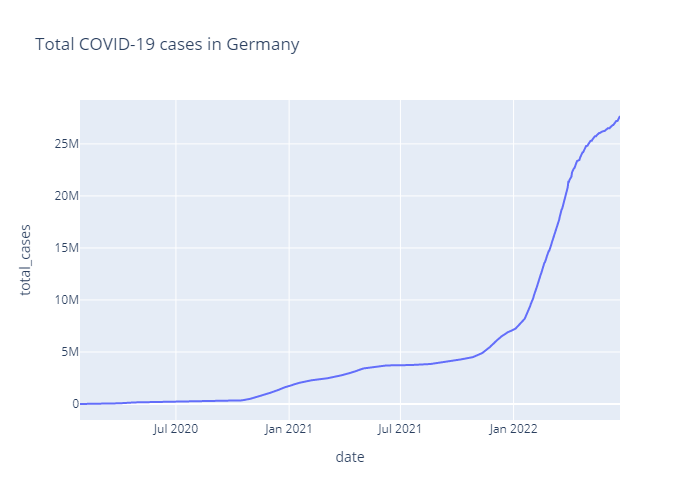

In [13]:
#Plot new cases as a along the date
import plotly.express as px

fig = px.line(df_germany, x="date", y="total_cases", title='Total COVID-19 cases in Germany')
fig.show("png")

In [14]:
# The total cases need to be normalised with the total population
df_norm = df_germany['total_cases']/df_germany['population']

# add new coloumn with normlised cases to the data frame
df_germany['total_cases_relative'] = df_norm

In [15]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_germany.drop(df_germany.index[df_germany['total_cases_relative'] == 0], inplace = True)

In [16]:
df_germany.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,population,population_density,total_cases_relative
66199,DEU,Europe,Germany,2020-01-27,1.0,1.0,0.0,83900471.0,237.016,1.191888e-08
66200,DEU,Europe,Germany,2020-01-28,4.0,3.0,0.0,83900471.0,237.016,4.767554e-08
66201,DEU,Europe,Germany,2020-01-29,4.0,0.0,0.0,83900471.0,237.016,4.767554e-08
66202,DEU,Europe,Germany,2020-01-30,4.0,0.0,0.0,83900471.0,237.016,4.767554e-08
66203,DEU,Europe,Germany,2020-01-31,5.0,1.0,0.0,83900471.0,237.016,5.959442e-08


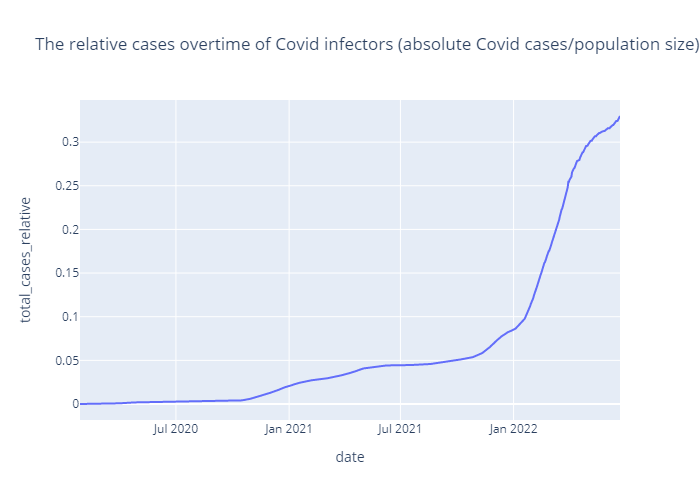

In [17]:
#Plot new cases as a function of date
import plotly.express as px

fig = px.line(df_germany, x="date", y="total_cases_relative", title='The relative cases overtime of Covid infectors (absolute Covid cases/population size) in Germany')
fig.show("png")

* 3 Countries - Germany, USA, India 

In [18]:
df_threeCountries = df[(df["iso_code"] == 'DEU')|(df["iso_code"] == 'IND')|(df["iso_code"] == 'USA')].copy()

In [19]:
df_threeCountries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,population,population_density
66199,DEU,Europe,Germany,2020-01-27,1.0,1.0,0.000,83900471.0,237.016
66200,DEU,Europe,Germany,2020-01-28,4.0,3.0,0.000,83900471.0,237.016
66201,DEU,Europe,Germany,2020-01-29,4.0,0.0,0.000,83900471.0,237.016
66202,DEU,Europe,Germany,2020-01-30,4.0,0.0,0.000,83900471.0,237.016
66203,DEU,Europe,Germany,2020-01-31,5.0,1.0,0.000,83900471.0,237.016
...,...,...,...,...,...,...,...,...,...
185842,USA,North America,United States,2022-06-19,86246101.0,15119.0,104324.286,332915074.0,35.608
185843,USA,North America,United States,2022-06-20,86297081.0,50980.0,90015.571,332915074.0,35.608
185844,USA,North America,United States,2022-06-21,86452232.0,155151.0,98999.286,332915074.0,35.608
185845,USA,North America,United States,2022-06-22,86636306.0,184074.0,99152.714,332915074.0,35.608


In [20]:
# The total cases need to be normalised with the total population
df_threeCountries['total_cases_relative'] = df_threeCountries['total_cases']/df_threeCountries['population']

In [21]:
df_threeCountries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,population,population_density,total_cases_relative
66199,DEU,Europe,Germany,2020-01-27,1.0,1.0,0.0,83900471.0,237.016,1.191888e-08
66200,DEU,Europe,Germany,2020-01-28,4.0,3.0,0.0,83900471.0,237.016,4.767554e-08
66201,DEU,Europe,Germany,2020-01-29,4.0,0.0,0.0,83900471.0,237.016,4.767554e-08
66202,DEU,Europe,Germany,2020-01-30,4.0,0.0,0.0,83900471.0,237.016,4.767554e-08
66203,DEU,Europe,Germany,2020-01-31,5.0,1.0,0.0,83900471.0,237.016,5.959442e-08


In [22]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_threeCountries.drop(df_threeCountries.index[df_threeCountries['total_cases_relative'] == 0], inplace = True)

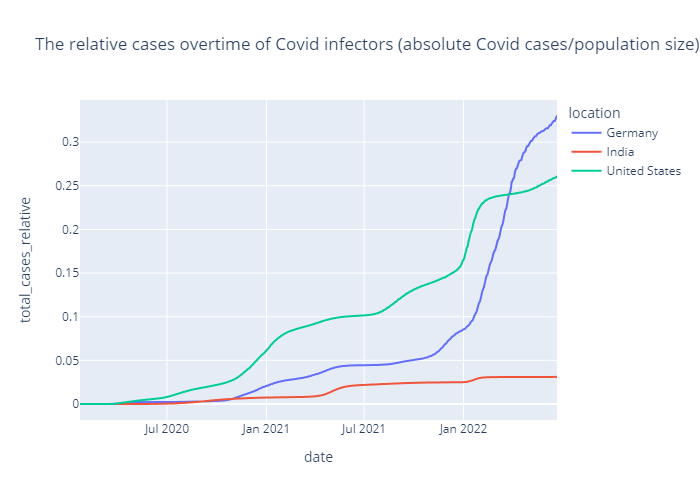

In [23]:
#Plot new cases as a function of date
import plotly.express as px

fig = px.line(df_threeCountries, x="date", y="total_cases_relative", color = 'location', title='The relative cases overtime of Covid infectors (absolute Covid cases/population size) in 3 countries')
fig.show("png")

## Delivery 2 - Figure 2: The vaccination rate (percentage of the population) over time

### Data preparation

In [24]:
url = 'https://ourworldindata.org/covid-cases'

In [25]:
#Load the data into a pandas dataframe. 
df=pd.read_csv("../data/external/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [26]:
# a lot of NaNs that we need to fill with some values
df.isnull().sum()

iso_code                                        0
continent                                   11386
location                                        0
date                                            0
total_cases                                  7902
                                            ...  
human_development_index                     38915
excess_mortality_cumulative_absolute       189601
excess_mortality_cumulative                189601
excess_mortality                           189601
excess_mortality_cumulative_per_million    189601
Length: 67, dtype: int64

In [27]:
#Fill NaNs with 0 and then drop all countries with iso_code = 0. This is key information that we need so dropping unknowns is the best way to handle. 
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [28]:
#Check how many nulls after filling
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196316 entries, 0 to 196315
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    196316 non-null  object 
 1   continent                                   196316 non-null  object 
 2   location                                    196316 non-null  object 
 3   date                                        196316 non-null  object 
 4   total_cases                                 196316 non-null  float64
 5   new_cases                                   196316 non-null  float64
 6   new_cases_smoothed                          196316 non-null  float64
 7   total_deaths                                196316 non-null  float64
 8   new_deaths                                  196316 non-null  float64
 9   new_deaths_smoothed                         196316 non-null  float64
 

In [30]:
#Print column names and drop the ones not using
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [31]:
df.drop([ 'total_cases', 'new_cases',
       'new_cases_smoothed','total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],axis=1, inplace=True)

### Data Understanding
* Germany as an example

In [32]:
#Save Germany data into a separate dataframe
df_germany = df[df["iso_code"] == 'DEU'].copy()
df_germany

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,population_density
66199,DEU,Europe,Germany,2020-01-27,0.0,0.0,0.0,0.00,0.0,0.00,83900471.0,237.016
66200,DEU,Europe,Germany,2020-01-28,0.0,0.0,0.0,0.00,0.0,0.00,83900471.0,237.016
66201,DEU,Europe,Germany,2020-01-29,0.0,0.0,0.0,0.00,0.0,0.00,83900471.0,237.016
66202,DEU,Europe,Germany,2020-01-30,0.0,0.0,0.0,0.00,0.0,0.00,83900471.0,237.016
66203,DEU,Europe,Germany,2020-01-31,0.0,0.0,0.0,0.00,0.0,0.00,83900471.0,237.016
...,...,...,...,...,...,...,...,...,...,...,...,...
67073,DEU,Europe,Germany,2022-06-19,182397534.0,64686295.0,63325844.0,217.40,77.1,75.48,83900471.0,237.016
67074,DEU,Europe,Germany,2022-06-20,182421610.0,64687145.0,63327144.0,217.43,77.1,75.48,83900471.0,237.016
67075,DEU,Europe,Germany,2022-06-21,182469255.0,64688358.0,63329383.0,217.48,77.1,75.48,83900471.0,237.016
67076,DEU,Europe,Germany,2022-06-22,182520121.0,64689475.0,63331376.0,217.54,77.1,75.48,83900471.0,237.016


In [33]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_germany.drop(df_germany.index[df_germany['people_vaccinated_per_hundred'] == 0], inplace = True)

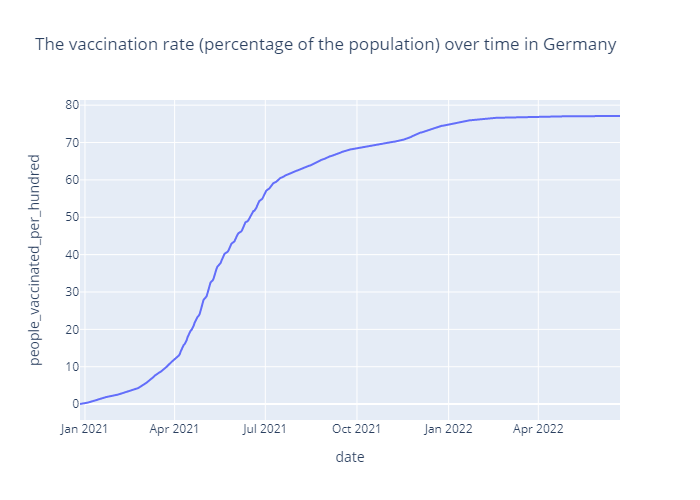

In [34]:
#Plot vaccination rate along the date
import plotly.express as px

fig = px.line(df_germany, x="date", y="people_vaccinated_per_hundred", title='The vaccination rate (percentage of the population) over time in Germany')
fig.show("png")

* 3 countries - Germany, USA, India

In [35]:
df_threeCountries_vaccinated = df[(df["iso_code"] == 'DEU')|(df["iso_code"] == 'IND')|(df["iso_code"] == 'USA')].copy()

In [36]:
df_threeCountries_vaccinated.head()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,population_density
66199,DEU,Europe,Germany,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,83900471.0,237.016
66200,DEU,Europe,Germany,2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,83900471.0,237.016
66201,DEU,Europe,Germany,2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,83900471.0,237.016
66202,DEU,Europe,Germany,2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,83900471.0,237.016
66203,DEU,Europe,Germany,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,83900471.0,237.016


In [37]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_threeCountries_vaccinated.drop(df_threeCountries_vaccinated.index[df_threeCountries_vaccinated['people_vaccinated_per_hundred'] == 0], inplace = True)

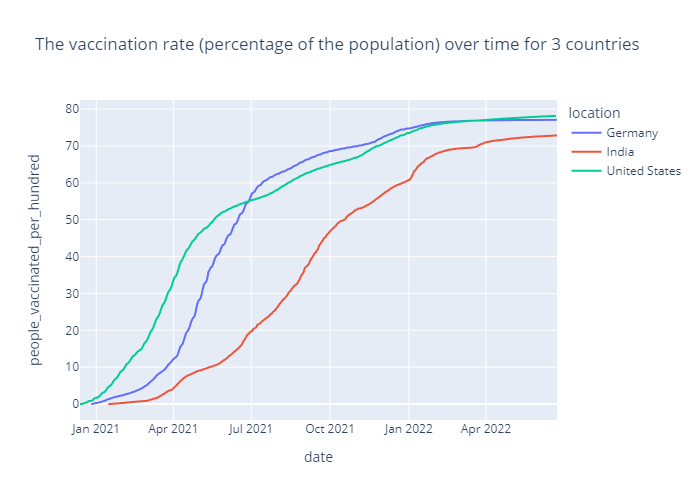

In [38]:
#Plot vaccination rate as a function of date
import plotly.express as px

fig = px.line(df_threeCountries_vaccinated, x="date", y="people_vaccinated_per_hundred", color = 'location', title='The vaccination rate (percentage of the population) over time for 3 countries')
fig.show("png")

### End of first project delivery


===================================